In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from tqdm.notebook import tqdm

## Check files on Euler storage

### Version 2

#### Materials
30k, all samples

In [6]:
data_basepath = r'/cluster/work/math/camlab-data/Wave_HemewS-3D'
res = sorted(os.listdir(os.path.join(data_basepath, 'version2', 'materials')))  # velocity
print(f'Number of files: {len(res)}')
res

Number of files: 15


['material100000-101999.npy',
 'material102000-103999.npy',
 'material104000-105999.npy',
 'material106000-107999.npy',
 'material108000-109999.npy',
 'material110000-111999.npy',
 'material112000-113999.npy',
 'material114000-115999.npy',
 'material116000-117999.npy',
 'material118000-119999.npy',
 'material120000-121999.npy',
 'material122000-123999.npy',
 'material124000-125999.npy',
 'material126000-127999.npy',
 'material128000-129999.npy']

In [11]:
a = np.load(os.path.join(data_basepath, 'materials', res[0]))
a.shape

(2000, 32, 32, 32)

#### Velocity

5.4k, only subset?

In [21]:
53687091200/(2**30)  # 50 GiB

50.0

In [8]:
data_basepath = r'/cluster/work/math/camlab-data/Wave_HemewS-3D'
res = sorted(os.listdir(os.path.join(data_basepath, 'version2', 'velocity')))  # 
print(f'Number of files: {len(res)}')
res

Number of files: 54


['velocity100000-100099.zip',
 'velocity100100-100199.zip',
 'velocity100200-100299.zip',
 'velocity100300-100399.zip',
 'velocity100400-100499.zip',
 'velocity100500-100599.zip',
 'velocity100600-100699.zip',
 'velocity100700-100799.zip',
 'velocity100800-100899.zip',
 'velocity100900-100999.zip',
 'velocity101000-101099.zip',
 'velocity101100-101199.zip',
 'velocity101200-101299.zip',
 'velocity101300-101399.zip',
 'velocity101400-101499.zip',
 'velocity101500-101599.zip',
 'velocity101600-101699.zip',
 'velocity101700-101799.zip',
 'velocity101800-101899.zip',
 'velocity101900-101999.zip',
 'velocity102000-102099.zip',
 'velocity102100-102199.zip',
 'velocity102200-102299.zip',
 'velocity102300-102399.zip',
 'velocity102400-102499.zip',
 'velocity102500-102599.zip',
 'velocity102600-102699.zip',
 'velocity102700-102799.zip',
 'velocity102800-102899.zip',
 'velocity102900-102999.zip',
 'velocity103000-103099.zip',
 'velocity103100-103199.zip',
 'velocity103200-103299.zip',
 'velocity

#### Metadata

In [24]:
mat_df = pd.read_csv(os.path.join(data_basepath, 'metadata_materials.tab'), sep='\t')
mat_df.head()

src_df = pd.read_csv(os.path.join(data_basepath, 'source_properties.tab'), sep='\t')
src_df.head()

,index,x_s (m),y_s (m),z_s (m),strike (°),dip (°),rake (°)
0,100000,6161,8368,-8803,125.477915,24.269489,109.482162
1,100001,7024,4435,-3513,70.157170,40.476039,94.115352
2,100002,3167,2278,-8355,64.196441,80.324263,234.888843
3,100003,1934,2766,-8262,338.083002,52.216644,340.116925
4,100004,3720,2202,-8201,250.500026,13.962981,278.378617


### Version 1

#### Materials
30k, all samples

In [10]:
data_basepath = r'/cluster/work/math/camlab-data/Wave_HemewS-3D'
res = sorted(os.listdir(os.path.join(data_basepath, 'version1', 'materials')))  # 
print(f'Number of files: {len(res)}')
res

Number of files: 15


['materials0-1999.npy',
 'materials10000-11999.npy',
 'materials12000-13999.npy',
 'materials14000-15999.npy',
 'materials16000-17999.npy',
 'materials18000-19999.npy',
 'materials2000-3999.npy',
 'materials20000-21999.npy',
 'materials22000-23999.npy',
 'materials24000-25999.npy',
 'materials26000-27999.npy',
 'materials28000-29999.npy',
 'materials4000-5999.npy',
 'materials6000-7999.npy',
 'materials8000-9999.npy']

#### Velocity
4k, only subset?

In [ ]:
data_basepath = r'/cluster/work/math/camlab-data/Wave_HemewS-3D'
res = list(Path(data_basepath).glob('version1/velocity/*.feather'))
print(f'Number of files: {len(res)}')

for f in tqdm(res):
    try:
        # Only read first 10 lines
        df = pd.read_feather(f, columns=['run'])
    except Exception as e:
        print(f'Error reading file {f}: {e}')
        continue
    if df.empty:
        print(f'Empty file: {f}')
        continue

Number of files: 300


  0%|          | 0/300 [00:00<?, ?it/s]

In [10]:
from pathlib import Path

raw_data_path=r'/cluster/work/math/camlab-data/Wave_HemewS-3D/version1'
processed_data_path=r'/cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1'   
S_out=32
Nt=64
f=10
fmax=5
max_files=9999

processed_subdir = f'inputs3D_S{S_out}_Z{S_out}_T{Nt}_fmax{fmax}'

os.makedirs(os.path.join(processed_data_path, processed_subdir), exist_ok=True)

fpaths_raw = np.array(sorted(Path(raw_data_path).joinpath('velocity').iterdir()))[:max_files]
fpaths_processed = np.array([
    os.path.join(processed_data_path, processed_subdir, f'shard{fnum}.h5') 
    for fnum in range(len(fpaths_raw))
])

file_exists = np.array([os.path.exists(fpath_processed) for fpath_processed in fpaths_processed])

print(f'There are {len(fpaths_raw)} files to process. {np.sum(file_exists)} files already processed. '
      f'Processing the remaining {np.sum(~file_exists)} files.')
fpaths_raw, fpaths_processed = fpaths_raw[~file_exists], fpaths_processed[~file_exists]
for fpath_raw, fpath_processed in tqdm(zip(fpaths_raw, fpaths_processed), desc='Processing files', total=len(fpaths_raw)):
    print(fpath_raw, fpath_processed)

There are 300 files to process. 284 files already processed. Processing the remaining 16 files.


Processing files:   0%|          | 0/16 [00:00<?, ?it/s]

/cluster/work/math/camlab-data/Wave_HemewS-3D/version1/velocity/velocity8500-8599.feather /cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5/shard284.h5
/cluster/work/math/camlab-data/Wave_HemewS-3D/version1/velocity/velocity8600-8699.feather /cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5/shard285.h5
/cluster/work/math/camlab-data/Wave_HemewS-3D/version1/velocity/velocity8700-8799.feather /cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5/shard286.h5
/cluster/work/math/camlab-data/Wave_HemewS-3D/version1/velocity/velocity8800-8899.feather /cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5/shard287.h5
/cluster/work/math/camlab-data/Wave_HemewS-3D/version1/velocity/velocity8900-8999.feather /cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5/shard288.h5
/cluster/work/math/camlab-data

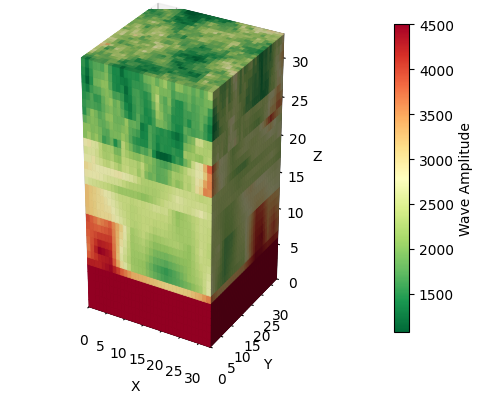

In [26]:
data = np.load(res[0])[0]

# Get dimensions from data
nx, ny, nz = data.shape
x_coords, y_coords, z_coords = np.arange(nx), np.arange(ny), np.arange(nz)

# Ensure symmetric color scale
abs_max = max(abs(data.min()), abs(data.max()))
vmin, vmax = -abs_max, abs_max

# Plot the 3D cube showing only the outer layer
plot3Dcube_outer_layer(
    data, x_coords, y_coords, z_coords, 
    cmap='RdYlGn_r',
    xlabel='X', ylabel='Y', zlabel='Z',
    vlabel='Wave Amplitude',
    figsize=(5, 8)
)


## Dataset size estimation

In [10]:
# 30k samples; 32x32x128 (x, y, t)

100 * 32*32*128 * 2/2**30  # 25 MB

0.0244140625

## Data preprocessing

In [3]:
import sys
sys.path.append('/cluster/home/lcarretero/workspace/rds/HEMEW3D/genfcd_prep')

import preprocessing_utils as preprocessing_utils
from importlib import reload
reload(preprocessing_utils)
from preprocessing_utils import butter_lowpass_filter, calc_interpolation_points

In [7]:
from preprocessing_utils import process_data


# Data count
max_samples = 10000
valid_split = 0.2

process_data(
    raw_data_path=r'/cluster/work/math/camlab-data/Wave_HemewS-3D/version1',
    processed_data_path=r'/cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1',
    S_out=32,
    Nt=128,
    f=20,
    fmax=5,
    max_files=2
)

Processing files: 100%|██████████| 2/2 [00:23<00:00, 11.80s/it]


In [2]:
import sys
sys.path.append('/cluster/home/lcarretero/workspace/rds/HEMEW3D/genfcd_prep')

import preprocessing_utils
from importlib import reload
reload(preprocessing_utils)
from preprocessing_utils import read_processed_data

In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from preprocessing_utils import read_processed_data
from plotting_utils import plot3Dcube_outer_layer

fpath = r'/cluster/home/lcarretero/workspace/rds/HEMEW3D/genfcd_prep/processed_data/inputs3D_S32_Z32_T128_fmax5/shard0.h5'

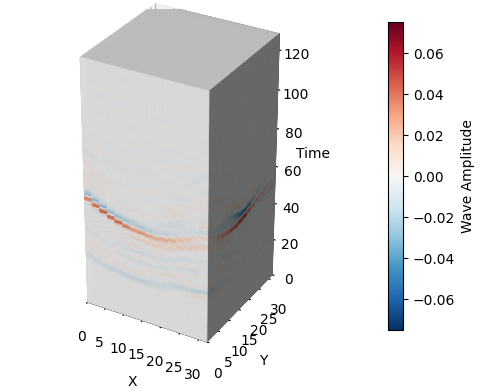

In [60]:
data = read_processed_data(fpath, comp='E', sample=80)

# 0, 1, 80

# Get dimensions from data
nx, ny, nt = data.shape
x_coords, y_coords, t_coords = np.arange(nx), np.arange(ny), np.arange(nt)

# Ensure symmetric color scale
abs_max = max(abs(data.min()), abs(data.max()))
vmin, vmax = -abs_max, abs_max

# Plot the 3D cube showing only the outer layer
plot3Dcube_outer_layer(
    data, x_coords, y_coords, t_coords, 
    cmap='RdBu_r',
    vmin=vmin, vmax=vmax,
    xlabel='X', ylabel='Y', zlabel='Time',
    vlabel='Wave Amplitude',
    figsize=(5, 8)
)


## Dataloader tests

#### Checking available shards

In [24]:
dataset_dirpath=r'/cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5'
import re
shard_files = [f.name for f in Path(dataset_dirpath).glob('*.h5')]
shard_numbers = np.array(sorted([int(re.search(r'shard(\d+)\.h5', f).group(1)) for f in shard_files]))
set(np.arange(len(shard_files))) - set(shard_numbers)


{284}

In [51]:
import sys
sys.path.append('/cluster/home/lcarretero/workspace/rds/GenCFD/GenCFD')

from importlib import reload
from dataloader import seismics
reload(seismics)

<module 'dataloader.seismics' from '/cluster/home/lcarretero/workspace/rds/GenCFD/GenCFD/dataloader/seismics.py'>

In [2]:
import sys
sys.path.append('/cluster/home/lcarretero/workspace/rds/GenCFD/GenCFD')

from dataloader.seismics import UnconditionalSeismic3D

UnconditionalSeismic3D_Metadata = dict(
    store_dirpath='/cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5',
    move_to_local_scratch=True,
    samples_per_file=100,
    channels=['uE'],
    input_shape=(32, 32, 64),
    max_files=10,
    cache_size=10,
    normalize=True,
    allow_stat_calculation=True
)

dataset = UnconditionalSeismic3D(**UnconditionalSeismic3D_Metadata)
res = dataset.__getitem__([1, 2], verbose=True)

Copying /cluster/work/math/camlab-data/Wave_HemewS-3D/processed/version1/inputs3D_S32_Z32_T64_fmax5 
to /scratch/tmp.29032486.lcarretero/inputs3D_S32_Z32_T64_fmax5...
Finished data copy.
Loading file /scratch/tmp.29032486.lcarretero/inputs3D_S32_Z32_T64_fmax5/shard0.h5 at location 1
Loading file /scratch/tmp.29032486.lcarretero/inputs3D_S32_Z32_T64_fmax5/shard0.h5 into cache
Loading file /scratch/tmp.29032486.lcarretero/inputs3D_S32_Z32_T64_fmax5/shard0.h5 at location 2
File /scratch/tmp.29032486.lcarretero/inputs3D_S32_Z32_T64_fmax5/shard0.h5 already in cache


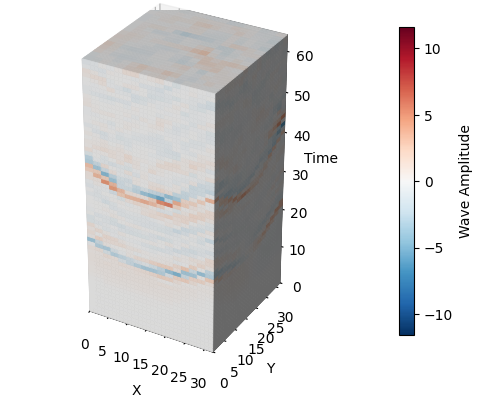

In [6]:
import sys
sys.path.append('/cluster/home/lcarretero/workspace/rds/HEMEW3D/GenCFD-prep/data-preprocessing')
from plotting_utils import plot3Dcube_outer_layer

data = dataset[0]['target_cond'][0]

# Get dimensions from data
nx, ny, nt = data.shape
x_coords, y_coords, t_coords = np.arange(nx), np.arange(ny), np.arange(nt)

# Ensure symmetric color scale
abs_max = max(abs(data.min()), abs(data.max()))
vmin, vmax = -abs_max, abs_max

# Plot the 3D cube showing only the outer layer
plot3Dcube_outer_layer(
    data, x_coords, y_coords, t_coords, 
    cmap='RdBu_r',
    vmin=vmin, vmax=vmax,
    xlabel='X', ylabel='Y', zlabel='Time',
    vlabel='Wave Amplitude',
    figsize=(5, 8)
)

In [23]:
from torch.utils.data import DataLoader
from tqdm.notebook import trange

dataset = UnconditionalSeismic3D(**UnconditionalSeismic3D_Metadata)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
dataloader_iter = iter(dataloader)

for _ in trange(len(dataloader)):
    res = next(dataloader_iter)

  0%|          | 0/1869 [00:00<?, ?it/s]

In [15]:
dataset_dirpath = '/scratch/tmp.29008825.lcarretero/inputs3D_S32_Z32_T64_fmax5'
fname = 'shard0.h5'

with h5py.File(os.path.join(dataset_dirpath, fname), 'r') as f:
    f['uE']

In [43]:
res = dataset[0:2]

res[0]['initial_cond'].shape, res[0]['target_cond'].shape

(torch.Size([1, 32, 32, 64]), torch.Size([1, 32, 32, 64]))

In [10]:
train_dataset, eval_dataset = train_test_split(dataset, split_ratio=0.8)
train_dataset[0]

NameError: name 'train_test_split' is not defined

In [23]:
import sys
sys.path.append('/cluster/home/lcarretero/workspace/rds/GenCFD')
from GenCFD.dataloader.fluid_flows_3d import IncompressibleFlows3D

TaylorGreen3D_Metadata = {
    'dataset_name': 'TaylorGreen3D',
    'file_name': 'N128_64.nc',
    'origin': '/cluster/work/math/camlab-data/data/incompressible/tg',
    'mean_file': 'mean_99000_0_64_False.npy',
    'std_file': 'std_99000_0_64_False.npy',
    'origin_stats': '/cluster/work/math/camlab-data/data/diffusion_project/TrainingStats_nothing_DataIC_3D_Time_TG'
}

dataset = IncompressibleFlows3D(
    file_system = {
        "dataset_name": "TaylorGreen3D",
        'file_name': 'taylor_green.nc',
        'origin': TaylorGreen3D_Metadata['origin'],
        # Additional not relevant file_system settings in case the mean and std were accumulated
        'stats_file': 'GroundTruthStats_ConditionalTaylorGreen',
        'origin_stats': TaylorGreen3D_Metadata['origin_stats'],
        # If the the single mean and std values in vector form are available
        'mean_file': TaylorGreen3D_Metadata['mean_file'],
        'std_file': TaylorGreen3D_Metadata['std_file']
    }
)
sample = dataset.__getitem__(0)
print(sample)

TypeError: IncompressibleFlows3D.__init__() missing 8 required positional arguments: 'input_channel', 'output_channel', 'spatial_resolution', 'input_shape', 'output_shape', 'variable_names', 'min_time', and 'max_time'